In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as  px
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("BankChurners.csv")
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [3]:
df.shape   # Veri setimizin kaç satır kaç sütun olduğuna bakalım.

(10127, 23)

In [4]:
df.columns  # Veri setimizin sütun başlıklarına (columns) bakalım.

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')



- `CLIENTNUM`: Müşteri Numarası
- `Attrition_Flag`: Ayrılma Bayrağı (Müşteri'nin Ayrılma Durumu)
- `Customer_Age`: Müşteri Yaşı
- `Gender`: Cinsiyet
- `Dependent_count`: Bakmakla Yükümlü Olduğu Kişi Sayısı
- `Education_Level`: Eğitim Seviyesi
- `Marital_Status`: Medeni Durum
- `Income_Category`: Gelir Kategorisi
- `Card_Category`: Kart Kategorisi
- `Months_on_book`: Kitapta Geçirilen Ay Sayısı
- `Total_Relationship_Count`: Toplam İlişki Sayısı
- `Months_Inactive_12_`: Son 12 Ayda Pasif Olunan Ay Sayısı
- `Contacts_Count_12_mon`: Son 12 Ayda İletişim Sayısı
- `Credit_Limit`: Kredi Limiti
- `Total_Revolving_Bal`: Toplam Dönüşen Bakiye
- `Avg_Open_To_Buy`: Ortalama Kullanılabilir Limit
- `Total_Amt_Chng_Q4_Q1`: Toplam Miktar Değişim Oranı (Son Çeyrekten İlk Çeyreğe)
- `Total_Trans_Amt`: Toplam İşlem Tutarı
- `Total_Trans_Ct`: Toplam İşlem Sayısı
- `Total_Ct_Chng_Q4_Q1`: Toplam İşlem Değişim Oranı (Son Çeyrekten İlk Çeyreğe)
- `Avg_Utilization_Ratio`: Ortalama Kullanım Oranırtalama Kullanım Oranı2_mon_2'

In [5]:
df.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
         "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], 
        axis=1, 
        inplace=True)
# Silinmesi gereken sütunları silelim.axis=1: SÜTUNLAR ÜZERİNDE İŞLEM YAPAR.İnplace=işlemin veri setinin üzerinde kalıcı haline gelmesini sağlar.

In [6]:
df.info()  # info ile veri setimizin boş satırlarına ve veri tiplerini,indexlerin kaçtan başlayıp kaça kadar gittiği gibi bilgileri görebiliriz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
df.isnull().sum()  # veri setimizin her sütunda kaçtane eksik değer olduğunu ve sum ile bunların toplamını görmüş oluruz.

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

**CİNSİYETE GÖRE DAĞILIM (Gender Distribution) GRUPLAMA VE GÖRSELLEŞTİRME:**

In [8]:
df["Gender"].index  # Burada index methodu ile Gender sütununun ındex sırasını görmüş olduk 0 dan baslayıp 10127 ye 1 er artarak devam etmiş.

RangeIndex(start=0, stop=10127, step=1)

In [9]:
gender_counts = df["Gender"].value_counts()
gender_counts

# burada Gender sütununda her eşsiz değerin kaç kez geçtiğini gösterir.2 eşsiz değer var F ve M.Bunların kaçkez geçtiğini görebiliyoruz.

Gender
F    5358
M    4769
Name: count, dtype: int64

In [10]:
gender_counts.index # burda index durumunda olan argümanlarımız Kadın ve Erkek...

Index(['F', 'M'], dtype='object', name='Gender')

In [11]:
gender_counts.values  # aslında value_counts() ile aynı işlevi yapar.Sadece numpy dizisi olarak değerlerin kaç kez geçtiğini gösterir..

array([5358, 4769], dtype=int64)

**NOT**: Burda gender_counts.index dediğimiz zaman index durumunda olan argümanları görüyoruz gender_counts.values dediğimizde aslında bu key lerin karşılığı 
olan değerleri görüyoruz..

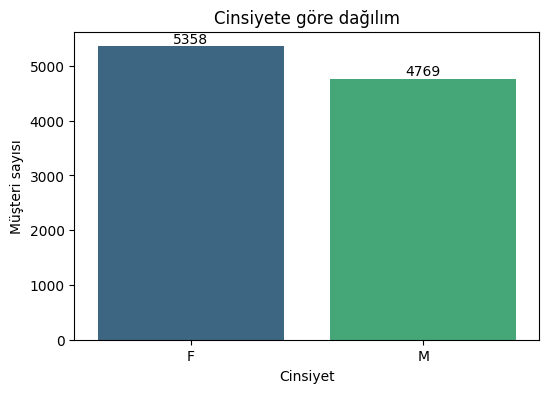

In [12]:
plt.figure(figsize = (6,4))
ax = sns.barplot(x = gender_counts.index , y = gender_counts.values, palette = "viridis")
for i,j in enumerate(gender_counts.values):
 ax.text(i, j + 0.5, str(j), ha="center", va="bottom")   
plt.title("Cinsiyete göre dağılım")
plt.xlabel("Cinsiyet")
plt.ylabel("Müşteri sayısı")
plt.show()

# seaborn kütüphanesinden barplot (cubuk grafiği) çizdiriyoruz.X eksenine gender_counts.indexleri yani M ve F gelecek. 
# y eksenine ise gender_counts.values değerini veriyoruz yani F,M karşılığı kaçkez geçtiğini veriyoruz.Renk olarak palette = viridis veriyoruz.
# bu görselleştirmede cinsiyete göre dağılım grafiğini görüyoruz.Erkek ve Kadın değerlerinin birbiri karşısındaki dağılımlarını görüyoruz.

**Burda Erkek ve Kadın Müşteri oranlarını görüyoruz ve sonuç olarak kadın müşterilerin erkek müşterilere göre oran olarak daha fazla olduğunu görselleştirmiş olduk.**

**EĞİTİM SEVİYESİNE GÖRE DAĞILIM (Education Level Distribution) GRUPLAMA VE GÖRSELLEŞTİRME:**

In [13]:
education_counts = df["Education_Level"].value_counts()
education_counts

# Burada Education_Level sütununda öğrenim durumlarının sayısını görmüş oluyoruz

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

In [14]:
education_counts.index

# Burada Education_Level sütunundaki index değerlerini görmüş olduk.
# NOT: education_counts_sorted = df["Education_Level"].value_counts().sort_index() bu method indexleri 0,1,2 sıralı şekilde ayarlamak için kullanılır.

Index(['Graduate', 'High School', 'Unknown', 'Uneducated', 'College',
       'Post-Graduate', 'Doctorate'],
      dtype='object', name='Education_Level')

In [15]:
education_counts.values # aslında value_counts() ile aynı işlevi yapar.Sadece numpy dizisi olarak değerlerin kaç kez geçtiğini gösterir..

array([3128, 2013, 1519, 1487, 1013,  516,  451], dtype=int64)

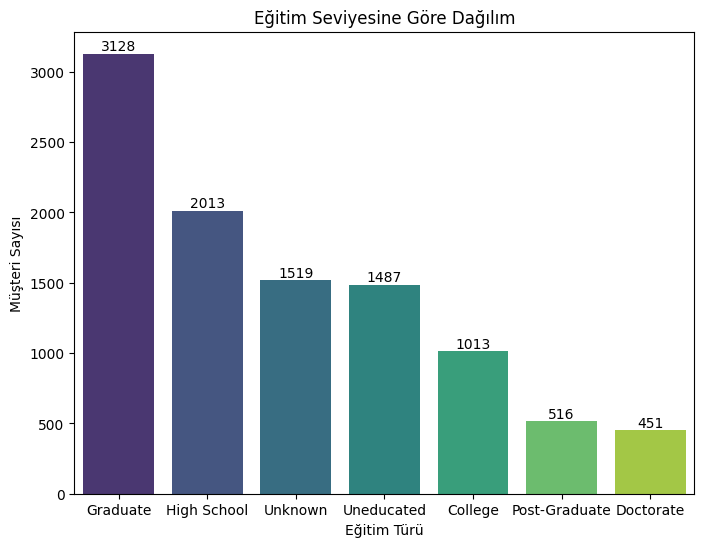

In [16]:
plt.figure(figsize = (8,6))
ax = sns.barplot(x=education_counts.index , y=education_counts.values, palette = "viridis")
for i,j in enumerate(education_counts.values):
    ax.text(i,j + 0.5, str(j),ha="center", va="bottom" )
plt.title("Eğitim Seviyesine Göre Dağılım")
plt.xlabel("Eğitim Türü")
plt.ylabel("Müşteri Sayısı")
plt.show()


# Burda seaborn ve matplotlib kütüphanelerini kullanarak eğitim seviyesine göre dağılım oranlarını gördük
# burda for döngüsü ile müşteri sayılarını barların üzerine yazdırdık.
# FOR DÖNGÜSÜ AÇIKLAMASI:
# enumerate(education_counts.values) ile education_counts serisinin her bir değeri (j) ve bunların indisleri (i) sırayla alınır.
# ax.text(i, j + 0.5, str(j), ha="center", va="bottom") ile her bir çubuğun üzerine (i, j + 0.5) koordinatlarına, str(j) değeri eklenir.
# ha="center" ve va="bottom" parametreleri ile metin, yatayda ortalanır ve çubuğun altına yerleştirilir.

**Burada**

- Lisans Mezunu Müşteri Sayısı =3128

- Lise Mezunu Müşteri Sayısı =2013

- Eğitimi Bilinmeyen Müşteri sayısı =1519

- Eğitimsiz Müşteri Sayısı = 1487

- Kolej Mezunu Müşteri Sayısı = 1013

- Yüksek Lisans Mezunu Müşteri Sayısı = 516

- Doktora Mezunu Müşteri Sayısı = 451 

**olduğunu gözlemliyoruz...**

**KAYBETME ORANINA GÖRE (Attrition Flag) GRUPLAMA VE GÖRSELLEŞTİRME**


In [17]:
atrittion_counts = df["Attrition_Flag"].value_counts()
atrittion_counts

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [18]:
atrittion_counts.index

Index(['Existing Customer', 'Attrited Customer'], dtype='object', name='Attrition_Flag')

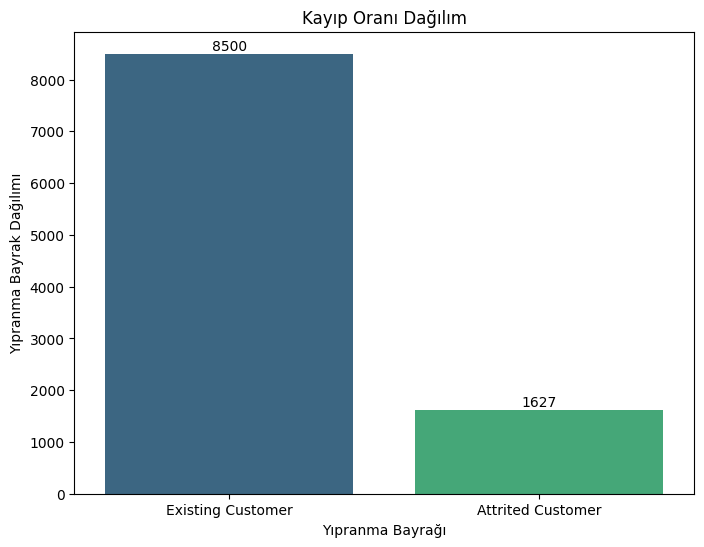

In [19]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=atrittion_counts.index, y=atrittion_counts, palette = "viridis")
for i,j in enumerate(atrittion_counts):
    ax.text(i,j + 0.5, str(j), ha="center", va="bottom")
plt.title("Kayıp Oranı Dağılım")
plt.xlabel("Yıpranma Bayrağı")
plt.ylabel("Yıpranma Bayrak Dağılımı")
plt.show()

**YAŞ DAĞILIMINA GÖRE  (Age Distribution) GRUPLAMA VE GÖRSELLEŞTİRME**

In [23]:
age_counts = df["Customer_Age"].value_counts()
age_counts
# sort_index(): Bu sayımları yaşlara göre artan sırada sıralar.

Customer_Age
44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
70      1
73      1
Name: count, dtype: int64

In [ ]:
plt.figure(figsize = (12,8))
ax = sns.barplot(x =age_counts.index, y= age_counts.values, palette="viridis")
for i,j in enumerate(age_counts.values):
    ax.text(i,j + 0.5, str(j), ha = "center", va = "bottom")
plt.title("Yaş Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Müşteri Sayısı")
plt.show()

**Burada yaşlara göre müşteri oranlarını görüyoruz daha çok 32 ile 60 yaş arası**

**GELİR KATEGORİSİNE GÖRE  (Income Category Distribution) GRUPLAMA VE GÖRSELLEŞTİRME**

In [ ]:
income_counts = df["Income_Category"].value_counts()
income_counts

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=income_counts.index, y= income_counts.values, palette="viridis")
plt.title("Gelir Kategorisi Dağılımı")
plt.xlabel("Gelir Kategorisi")
plt.ylabel("Müşteri Sayısı")
plt.xticks(rotation=45)
plt.show()

**MAVİ KART SAHİPLERİNİN SAYISI VE YILLIK GELİRİ $40 K'IN ALTINDA OLANLARIN YÜZDESİ** 

In [ ]:
df["Income_Category"].value_counts()

In [ ]:
df["Card_Category"].value_counts()

In [ ]:
(df["Card_Category"] == "Blue").value_counts()

**Mavi kart sahiplerini ve yıllık geliri $40 altında olanların yüzdesini for döngüsü kullanarak bulmak**

In [ ]:
mavi_kart_sayisi = 0
gelir_40k_altında_sayisi = 0
toplam_kayıt_sayisi =len(df)

for index,row in df.iterrows():
    if row["Card_Category"] == "Blue":
      mavi_kart_sayisi += 1  
    if row["Income_Category"] == "Less than $40K":
        gelir_40k_altında_sayisi += 1

yuzde = (gelir_40k_altında_sayisi / mavi_kart_sayisi) * 100 

print("Mavi Kart Sahiplerinin Sayısı:", mavi_kart_sayisi)
print("Geliri $40 Altında Olanların Sayısı",gelir_40k_altında_sayisi)
print("Yıllık Geliri 40.000 Doların Altında Olanların Yüzdesi:", yuzde)

**Mavi kart sahiplerini ve yıllık geliri $40 altında olanların yüzdesini normal şekilde bulmak**

In [ ]:
# Geliri 40.000 Doların altında olanların sayısını bulma
gelir_40k_altinda_sayisi = df[df['Income_Category'] == "Less than $40K"].shape[0]

# Mavi Kart sahiplerinin sayısını bulma
mavi_kart_sayisi = df[df['Card_Category'] == 'Blue'].shape[0]

# Yüzde hesaplama
yuzde = (gelir_40k_altinda_sayisi / mavi_kart_sayisi) * 100 if mavi_kart_sayisi != 0 else 0

print("Mavi Kart Sahiplerinin Sayısı:", mavi_kart_sayisi)
print("Geliri 40.000 Doların Altında Olanların Sayısı:", gelir_40k_altinda_sayisi)
print("Yıllık Geliri 40.000 Doların Altında Olanların Yüzdesi:", yuzde)

In [ ]:
df["Income_Category"].unique()

In [ ]:
(df["Card_Category"] == "Gold").value_counts()

**En yüksek kayıp oranı $40-$60 gelir aralığında Altın Kart 
sahiplerinde gözlemlendi
Kayıp oranlarını hesaplay**ın

In [ ]:
filtered_df = df[(df["Income_Category"] == '$40K - $60K') & (df["Card_Category"] == 'Gold')]
filtered_df

In [ ]:
filtered_df = df[(df["Income_Category"] == '$80K - $120K') & (df['Card_Category'] == 'Gold') & (df["Attrition_Flag"]=="Attrited Customer")]
filtered_df

In [ ]:
filtered_df["Attrition_Flag"].value_counts()

In [ ]:
# 1. Yıllık geliri $80K - $120K arasında olan müşterilerin sayısını belirleyelim.
total_customers_in_income_range = df[df["Income_Category"] == '$80K - $120K'].shape[0]

# 2. Yıllık geliri $80K - $120K arasında olup "Attrited Customer" kategorisinde olan müşterilerin sayısını belirleyin
attrited_customers_in_income_range = df[(df["Income_Category"] == '$80K - $120K') & (df["Attrition_Flag"] == "Attrited Customer")].shape[0]

# 3. Kayıp müşteri oranını hesaplayın
attrition_rate = (attrited_customers_in_income_range / total_customers_in_income_range) * 100

# Sonucu yazdıralım
print(f"Yıllık geliri $80K - $120K arasında olan müşteriler arasında kayıp müşteri oranı: {attrition_rate:.2f}%")  # :.2f ondalıktan sonra sadece 2 sayı alır

**Kayıp oranı yüksek olan müşteriler genellikle son 12 ayda banka ile daha
fazla iletişim kurmu şKayıp oranı ve banka ile iletişim sayısını bulunuz.**

In [ ]:
# 1. Kayıp müşterilerin sayısını ve toplam müşteri sayısını belirleyelim

total_customers = len(df)  # tüm müşterilerin satır sayısını gösterir doğal olarak bütün müşterileri döndürür..

attrited_customers = df[df["Attrition_Flag"] == "Attrited Customer"].shape[0] #burada ise ayrılmış olan müşterileri döndürür..

# 2. Kayıp müşteri oranını hesaplayalım

attrition_rate = (attrited_customers / total_customers)*100

# 3. Kayıp müşterilerin ve mevcut müşterilerin son 12 ayda banka ile iletişim sayısını ortalama olarak hesaplayalım

average_contacts_attrited = df[df["Attrition_Flag"]=="Attrited Customer"]["Contacts_Count_12_mon"].mean()
average_contacts_existing = df[df["Attrition_Flag"]=="Existing Customer"]["Contacts_Count_12_mon"].mean()

print(f"Kayıp müşteri oranı: {attrition_rate:.2f}%")
print(f"Kayıp müşterilerin son 12 ayda ortalama banka ile iletişim sayısı: {average_contacts_attrited:.2f}")
print(f"Mevcut müşterilerin son 12 ayda ortalama banka ile iletişim sayısı: {average_contacts_existing:.2f}")

# BURDA :.2f ondalıktan sonra kac basamak olacagını belirtmek için kullanılır..

In [ ]:
filtered_df = df[df["Income_Category"] == '$80K - $120K']
card_counts = filtered_df.groupby('Card_Category').size().reset_index(name='User_Count')
card_counts

In [ ]:
filtered_df = df[df["Income_Category"] == '$60K - $80K']
card_counts = filtered_df.groupby('Card_Category').size().reset_index(name='User_Count')
card_counts

In [ ]:
filtered_df = df[df["Income_Category"] == '$120K +']
card_counts = filtered_df.groupby('Card_Category').size().reset_index(name='User_Count')
card_counts

In [ ]:
filtered_df = df[df["Income_Category"] == '$40K - $60K']
card_counts = filtered_df.groupby('Card_Category').size().reset_index(name='User_Count')
card_counts

# ÖNERİLERİN UYGULANMASI ÖZEL İNDİRİMLER VE PROMOSYONLAR

In [ ]:
data = {'Kart_Tipi': ['Mavi Kart', 'Mavi Kart', 'Altın Kart', 'Altın Kart', 'Eski Müşteri'],
        'Gelir': ['$60-$80', '$80-$120', '$60-$80', '$80-$120', 'Kayıp'],
        'Risk': ['Düşük', 'Düşük', 'Düşük', 'Yüksek', 'Yüksek']}

df = pd.DataFrame(data)

# Yeni sütunlar ekleyerek promosyonları hesaplayalım
df['Mavi_Kart_Indirim'] = df.apply(lambda row: 0.2 if 'Mavi Kart' in row['Kart_Tipi'] and '$60-$80' in row['Gelir'] else (0.1 if 'Mavi Kart' in row['Kart_Tipi'] and '$80-$120' in row['Gelir'] else 0), axis=1)
df['Altın_Kart_Indirim'] = df.apply(lambda row: 0.1 if 'Altın Kart' in row['Kart_Tipi'] and '$60-$80' in row['Gelir'] else (0.05 if 'Altın Kart' in row['Kart_Tipi'] and '$80-$120' in row['Gelir'] else 0), axis=1)
df['Eski_Müşteri_Promosyonu'] = df.apply(lambda row: 'Tatil Paketi' if 'Eski Müşteri' in row['Kart_Tipi'] else '', axis=1)

# Yeni DataFrame'i oluşturarak CSV dosyasına yazalım
ozel_promosyon = df[['Kart_Tipi', 'Gelir', 'Risk', 'Mavi_Kart_Indirim', 'Altın_Kart_Indirim', 'Eski_Müşteri_Promosyonu']]
ozel_promosyon.to_csv('ozel_promosyonlar.csv', index=False)

pd.read_csv("ozel_promosyonlar.csv")